# Data Scientist Nonodegree Project 4: Capstone Project 

## Introduction

As an aspiring People Data Analyst, I decided to use IBM's HR Analytics Employee Attrition and Performance dataset to show the skills I learned from Udacity's Data Scientist Nonodegree Program. For this capstone, I will apply the data science process CRISP-DM that I have been familiar with.

## IBM HR Analytics Employee Attrition

In this project, we were using IBM Data **HR Analytics Employee Attrition** from [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). The data contain only 1470 records which somehow small data set, but it contains many features that we can use in analysis and in building the model. There are multiple questions we are going to answer. by analyzing and visualizing the data that will be presented in order to answer each question. then we will build a supervised Machine Learning algorithm **Classification** model to predict employee attrition.

### Business Understanding
#### Questions: 
1. Is there a field that has attrited more than the others at IBM?
2. Is there are differences between male and female attrition rates?
3. How likely the travel could affect employee attrition?
4. What is the most age range has a lot of attrited?
5. What is the age range that has the highest average monthly income?
6. What is the age range that has the lowest average job satisfaction rate?
7. What is the most marital status of the employee who left IBM?
8. Is there a correlation between the monthly income and the number of years at IBM?

### Data Understanding

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# read the data 
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
print("We have {} Features and {} Records.".format(df.shape[1], df.shape[0]))

We have 35 Features and 1470 Records.


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Some data types need to be changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Check the null values 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Data preparation 

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.drop(columns = ['DailyRate', 'EmployeeCount', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours', 'StockOptionLevel'], 
        inplace = True)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,6,3,3,2,2,2,2


We dropped some attributes since it hasn't a clear explanation and we will not use them whether in our analysis or model.

##### Changing the data types

In [10]:
categorical_column = ['Department', 'Attrition', 'EducationField', 'BusinessTravel', 'Gender', 'MaritalStatus']
for column in categorical_column:
    df[column] = df[column].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   object  
 13  JobSatisfaction           1470 non-null   int64 

In [12]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,9,NaN,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,326,NaN,673,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1024.865306,2.721769,NaN,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,2.693197,NaN,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.024165,NaN,602.024335,1.093082,NaN,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,2.498009,NaN,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,491.250000,2.000000,NaN,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,1.000000,NaN,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1020.500000,3.000000,NaN,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,2.000000,NaN,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1555.750000,4.000000,NaN,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,4.000000,NaN,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [13]:
df.loc[df['Age'] == 60]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
411,60,No,Travel_Rarely,Research & Development,7,3,Life Sciences,549,1,Female,3,5,Manager,1,Married,19566,5,No,11,3,4,33,5,1,29,8,11,10
427,60,No,Travel_Frequently,Sales,28,3,Marketing,573,3,Female,2,3,Sales Executive,1,Married,10266,4,No,19,3,4,22,5,4,18,13,13,11
536,60,No,Travel_Rarely,Sales,16,4,Marketing,732,1,Male,3,2,Sales Executive,1,Single,5405,8,No,14,3,4,10,1,3,2,2,2,2
879,60,No,Travel_Rarely,Sales,7,4,Marketing,1233,2,Male,4,2,Sales Executive,4,Divorced,5220,0,Yes,18,3,2,12,3,3,11,7,1,9
1209,60,No,Travel_Rarely,Research & Development,1,4,Medical,1697,3,Male,1,3,Healthcare Representative,4,Divorced,10883,3,No,20,4,3,19,2,4,1,0,0,0


### Data Analysis and Visualization

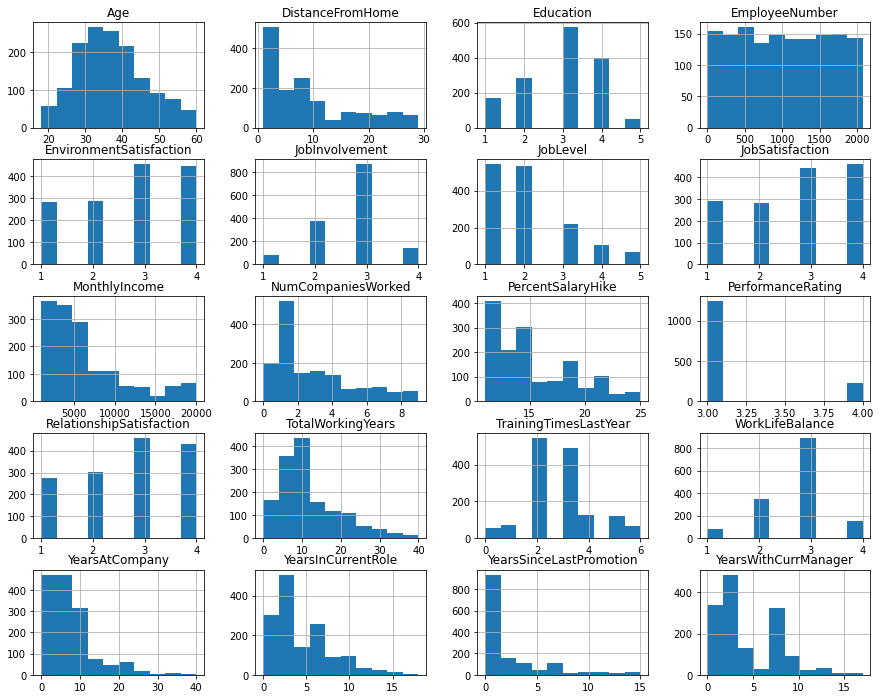

In [14]:
# Take an overview about the data distribution 
df.hist(figsize=(15, 12));

In [15]:
# Create a age group 
bins = [18, 30, 40, 50, 59, 60]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['Age_range'] = pd.cut(df.Age, bins,labels = labels,include_lowest = True)

In [16]:
df.sample(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_range
509,33,No,Travel_Frequently,Research & Development,6,3,Life Sciences,692,3,Male,3,2,Healthcare Representative,4,Divorced,7725,3,No,23,4,3,15,2,1,13,11,4,7,30-39
572,29,No,Travel_Rarely,Research & Development,27,3,Medical,793,2,Female,3,2,Healthcare Representative,3,Married,4335,4,No,12,3,1,11,3,2,8,7,1,1,18-29
639,49,No,Travel_Rarely,Research & Development,1,3,Technical Degree,887,3,Female,3,1,Research Scientist,1,Married,3580,2,No,16,3,2,7,2,3,4,2,0,2,40-49
54,26,No,Travel_Rarely,Sales,23,3,Marketing,72,3,Female,2,2,Sales Executive,4,Married,4157,7,Yes,19,3,3,5,2,2,2,2,0,0,18-29
813,39,Yes,Travel_Frequently,Research & Development,2,3,Life Sciences,1127,1,Male,3,4,Healthcare Representative,4,Divorced,12169,7,No,11,3,4,21,4,3,18,7,11,5,30-39
947,52,Yes,Travel_Rarely,Sales,5,3,Life Sciences,1319,2,Male,3,3,Sales Executive,2,Single,8446,9,Yes,19,3,3,10,2,2,8,7,7,7,50-59
351,32,No,Travel_Rarely,Research & Development,2,3,Medical,471,3,Female,3,1,Laboratory Technician,2,Married,2370,1,No,13,3,3,8,4,3,8,0,0,7,30-39
1009,58,No,Travel_Rarely,Research & Development,1,3,Medical,1423,4,Female,3,5,Research Director,1,Married,19701,3,Yes,21,4,3,32,3,3,9,8,1,5,50-59
477,50,No,Travel_Frequently,Human Resources,3,3,Medical,644,1,Male,3,5,Manager,2,Married,18200,1,No,11,3,3,32,2,3,32,5,10,7,40-49
1390,28,Yes,Travel_Rarely,Research & Development,17,3,Technical Degree,1960,3,Male,2,1,Laboratory Technician,4,Divorced,2367,5,No,12,3,1,6,2,2,4,1,0,3,18-29


In [17]:
# We will spilt the df into two df's one for the employee who have attritions and the other who haven't
df_attrition = df.loc[df['Attrition'] == 'Yes']
df_not_att = df.loc[df['Attrition'] == 'No']

In [18]:
def get_total_count(df, col):
    '''
    Get the total count for each varibale 
    
    INPUT:
    df: DataFrame 
    col: column
    
    OUTPUT:
    DataFrame: count the column 
    
    '''
    
    total_count = df[col].value_counts()
    
    return total_count

In [19]:
def get_mean(df,lis,var):

    """ 
    Group by and get the mean for the variable 
  
    Parameters: 
    df: Dataframe
    lis: list of columns to group by
    var: variable
    
    Returns: 
    Dataframe: grouped by the lis and getting their mean 
  
    """
    mean = df.groupby(lis)[var].mean()

    return mean

#### Question 1: Is there is a field that has attrited more than the others?

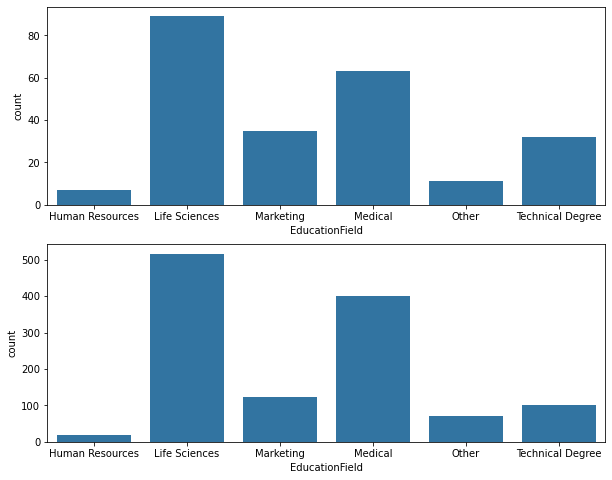

In [20]:
fig, ax = plt.subplots(nrows=2, figsize = [10,8])
color = sb.color_palette()[0]
sb.countplot(data = df_attrition, x = 'EducationField', color = color, ax=ax[0]);
sb.countplot(data = df_not_att, x = 'EducationField', color = color, ax=ax[1]);

We can find the there is no big difference but in the employees who field is **Technical Degree** has a higher percentage of attrited around *20%*, it was expected since there are a lot of oppourtunies in this field and many companies need them.

#### Question 2: Is there are differences between male and female attrition rates?

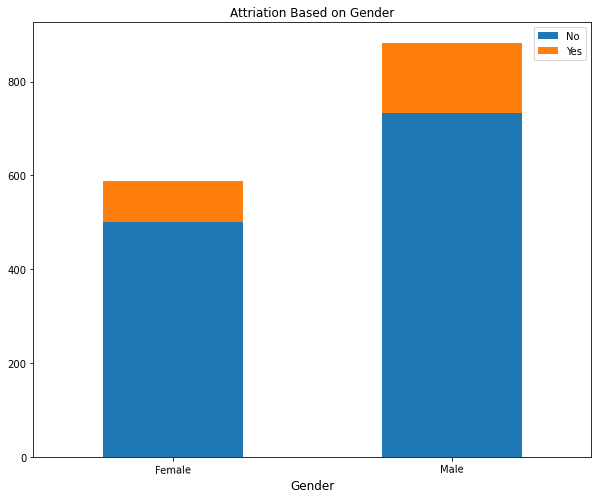

In [21]:
data = pd.crosstab(df['Gender'], df['Attrition']).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('Attriation Based on Gender')
plt.xlabel('Gender', fontsize = 12)
plt.legend()
plt.xticks(rotation=1);
plt.show()

In [22]:
(df.loc[df['Attrition'] == 'Yes'].Gender.value_counts()/ df.Gender.value_counts()) * 100

Male      17.006803
Female    14.795918
Name: Gender, dtype: float64

We notice that *17%* of the male in **IBM** are attrited more than females only *14.8%* and that could be because the male are taking risks or the females are patient and give the opportunity enough time before they decide to leave. here we can't decide the reason because it depends on the human itself.

#### Question 3: How likely the travel could affect employee attrition? 

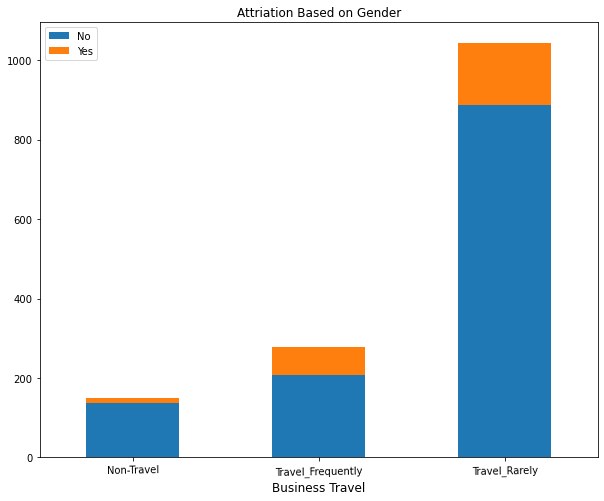

In [23]:
data = pd.crosstab(df['BusinessTravel'], df['Attrition']).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('Attriation Based on Gender')
plt.xlabel('Business Travel', fontsize = 12)
plt.legend()
plt.xticks(rotation=1);
plt.show()

In [24]:
(df.loc[df['Attrition'] == 'Yes'].BusinessTravel.value_counts()/ df.BusinessTravel.value_counts()) * 100

Travel_Rarely        14.956855
Travel_Frequently    24.909747
Non-Travel            8.000000
Name: BusinessTravel, dtype: float64

We could see that almost *25%* of the employee who **travels frequently** have attrited since there are many factors affect on the employee especially when the employee is married because the family can affect many decisions in a person life even though if the income is high, a lot of people will accept less income but they can be with their family a lot. 

#### Question 4: What is the most age range has a lot of attrited?

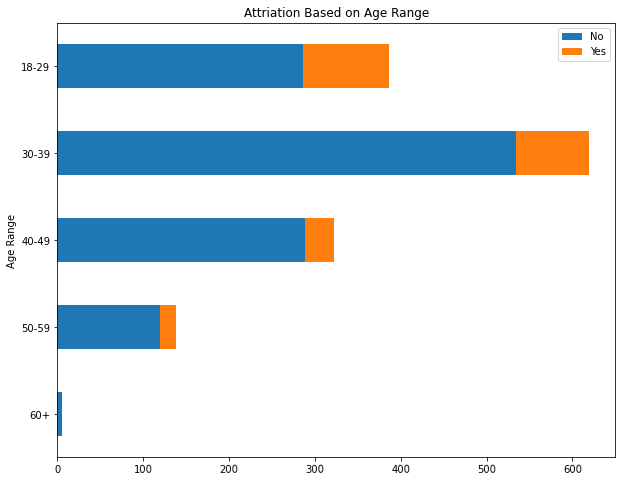

In [25]:
data = pd.crosstab(df['Age_range'], df['Attrition']).sort_values(by='Age_range', ascending=False).plot(kind = 'barh', stacked = True, figsize = (10, 8))

plt.title('Attriation Based on Age Range')
plt.ylabel('Age Range', fontsize = 10)
plt.legend()
plt.xticks(rotation=1);
plt.show()

The age range who are between **18-29** is the most attrited and that could be because there are a lot of opportunities for them they have a bigger chance to change their career path or even they still trying to find the best field. also, many of them are not married yet so, they can take the risk to move to another job or start a new business. we notice when you get older and older you try to look for stability. and at group **+60** there isn't attrited which make sense because a lot of people at this age are thinking about retirement not attrition.  

#### Question 5: What is the age range that has the highest average monthly income?

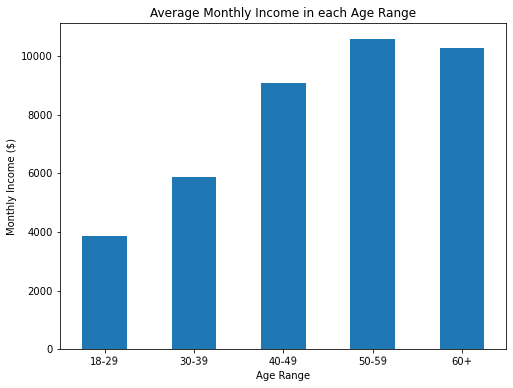

In [26]:
get_mean(df,['Age_range'],'MonthlyIncome').plot(kind='bar', figsize = (8,6))
plt.title('Average Monthly Income in each Age Range', fontsize = 12)
plt.xlabel('Age Range');
plt.ylabel('Monthly Income ($)');
plt.xticks(rotation=1);

The average monthly income is highest at **group 50-59** which a lot of employees in this group becomes in these positions managers, directors, and C-level. Even in the real-life when getting older your income will increase and your expenses will increase as well.

#### Question 6: What is the age range that has the lowest average job satisfaction rate?

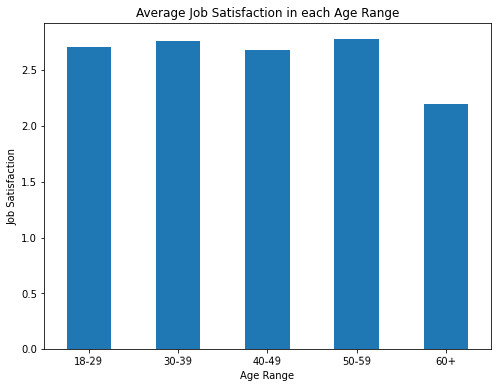

In [27]:
get_mean(df,['Age_range'],'JobSatisfaction').plot(kind='bar', figsize = (8,6))
plt.title('Average Job Satisfaction in each Age Range', fontsize = 12)
plt.ylabel('Job Satisfaction');
plt.xlabel('Age Range');
plt.xticks(rotation=1);

we can notice that the employee who are +60 they not that satisfaied about the job and that could be because a lot of them are getting tired of work.  

#### Question 7: What is the most marital status of the employee who left IBM?

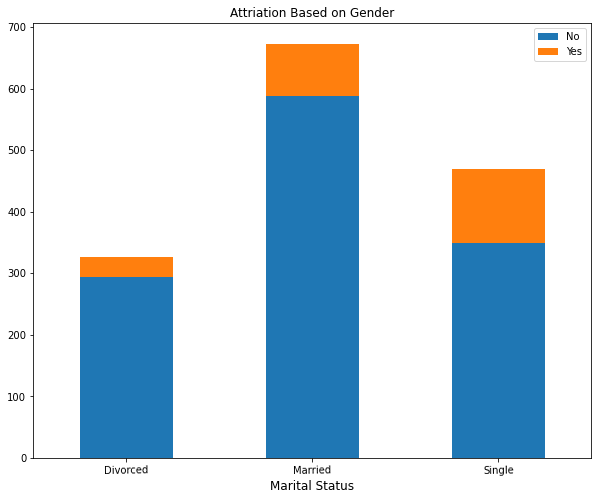

In [28]:
data = pd.crosstab(df['MaritalStatus'], df['Attrition']).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('Attriation Based on Gender')
plt.xlabel('Marital Status', fontsize = 12)
plt.legend()
plt.xticks(rotation=1);
plt.show()

As we have mentioned many employees attritions when they are single because it's difficult to change your work when you are married and especially when you have children. 

In [29]:
# Create a copy of the dataframe to change the datatype of some attributes 
df_str = df.copy()

string_column = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',  
                  'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EmployeeNumber', 'JobLevel']
for column in string_column:
    df_str[column] = df_str[column].astype(str)

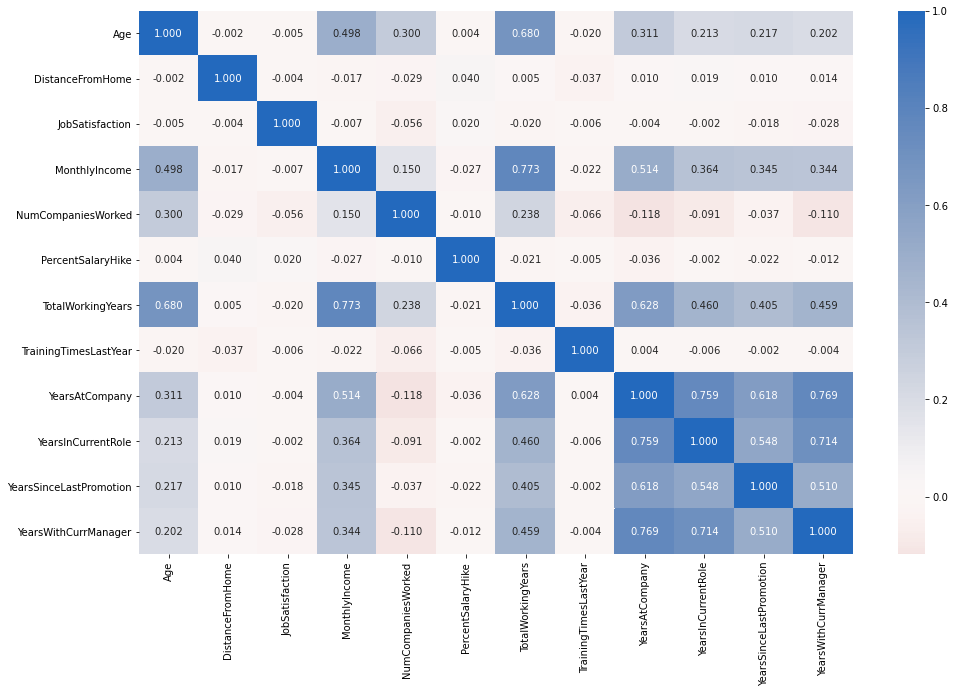

In [30]:
# Try to find a correlation between features 
plt.figure(figsize = [16, 10])
sb.heatmap(df_str.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

#### Question 8: Is there a correlation between the monthly income and the number of years at IBM?

<Figure size 576x432 with 0 Axes>

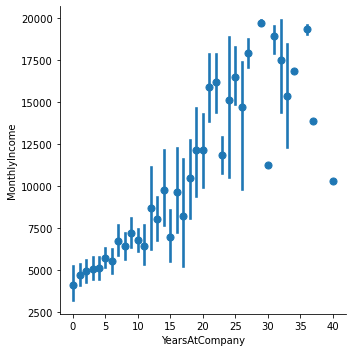

In [31]:
plt.figure(figsize = [8, 6]);
sb.lmplot(x="YearsAtCompany", y="MonthlyIncome", data=df_str, x_estimator=np.mean, fit_reg = False);

In [32]:
df_attrition.PercentSalaryHike.mean()

15.09704641350211

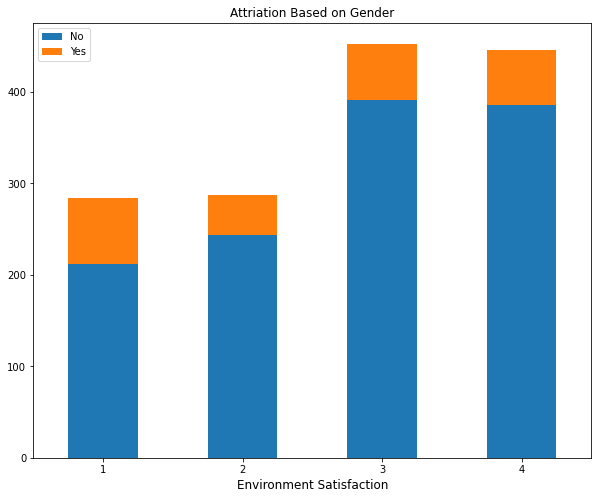

In [33]:
data = pd.crosstab(df_str['EnvironmentSatisfaction'], df_str['Attrition']).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('Attriation Based on Gender')
plt.xlabel('Environment Satisfaction', fontsize = 12)
plt.legend()
plt.xticks(rotation=1);
plt.show()

In [34]:
(df_str.loc[df_str['Attrition'] == 'Yes'].EnvironmentSatisfaction.value_counts()/ df_str.EnvironmentSatisfaction.value_counts()) * 100

1    25.352113
2    14.982578
3    13.686534
4    13.452915
Name: EnvironmentSatisfaction, dtype: float64

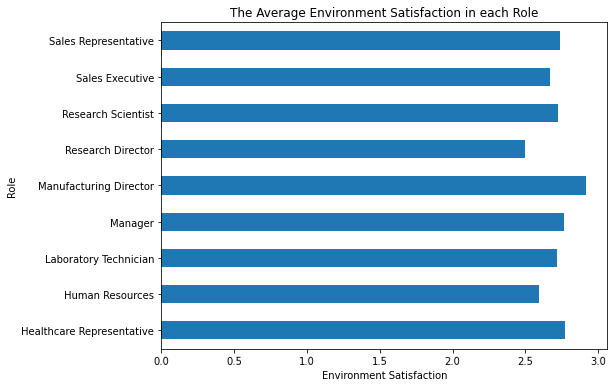

In [35]:
get_mean(df,['JobRole'],'EnvironmentSatisfaction').plot(kind='barh', figsize = (8,6))
plt.title('The Average Environment Satisfaction in each Role', fontsize = 12)
plt.xlabel('Environment Satisfaction');
plt.ylabel('Role');
plt.xticks(rotation=1);

We found a correlation between the years the employee will spend at IBM and the monthly income since the average percent salary hike is 15.2% and that lets the us see what is the average percent salary hike for the employee who left the company and we found it 15.09% which is very close to the overall. So that let us ask questions about the Environment Satisfaction. And we found that there is 25.35% of the employee who is not satisfied with the working environment that the affects a lot on the employee performance as well.z Also, we found the Researched Director has an average rate of Environment Satisfaction is the less which we can let us investigate further with the employees. 

### Data Modeling 

In [36]:
# Machine Learning Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# Make a copy of the dataframe to build our models
ml_df = df.copy()

In [37]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   object  
 13  JobSatisfaction           1470 non-null   int64 

In [38]:
# Must convert categorical/ string variables to dummy variables
ml_df = pd.get_dummies(ml_df, columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole','Gender',
                                        'MaritalStatus', 'OverTime', 'Age_range'])

In [39]:
# We will drop the columns in the new df that we don't need in our model  
ml_df.drop(columns=['Attrition_No', 'EmployeeNumber'], axis=1, inplace=True)
ml_df.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True )

In [40]:
ml_df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age_range_18-29,Age_range_30-39,Age_range_40-49,Age_range_50-59,Age_range_60+
0,41,1,2,2,3,2,4,5993,8,11,3,1,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
1,49,8,1,3,2,2,2,5130,1,23,4,4,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
2,37,2,2,4,2,1,3,2090,6,15,3,2,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
3,33,3,4,4,3,1,3,2909,1,11,3,3,8,3,3,8,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
4,27,2,1,1,3,1,2,3468,9,12,3,4,6,3,3,2,2,2,2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0


In [41]:
# Check the nulls values 
ml_df.isnull().sum()

Age                                  0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition                            0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales         

In [42]:
X_df = ml_df.drop('Attrition', axis=1)

In [43]:
# Create independent variables
X = X_df


# Create dependent variables
y = ml_df['Attrition']

In [44]:
#Splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42) 

**Random Forest**

In [45]:
# create a Random Forest model
rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train) #fit


rf_y_train_preds = rf_model.predict(X_train)
rf_y_test_preds = rf_model.predict(X_test) 

In [46]:
rf_model.score(X_test, y_test)

0.8741496598639455

In [47]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, rf_y_test_preds)))
print("F1-score: {:.4f}".format(fbeta_score(y_test, rf_y_test_preds, beta = 0.5)))

Accuracy: 0.8741
F1-score: 0.3175


In [48]:
overall_accuracy = (rf_y_test_preds == y_test).mean().mean()


print(classification_report(y_test,rf_y_test_preds))
print()
print('Average Overall Accuracy {0:.2f}%'.format(overall_accuracy*100))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294


Average Overall Accuracy 87.41%


**Decision Tree**

In [49]:
# create a Decision Tree model
dt_model = DecisionTreeClassifier() 
dt_model.fit(X_train, y_train) #fit


dt_y_train_preds = dt_model.predict(X_train)
dt_y_test_preds = dt_model.predict(X_test) 

In [50]:
dt_model.score(X_test, y_test)

0.782312925170068

In [51]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, dt_y_test_preds)))
print("F1-score: {:.4f}".format(fbeta_score(y_test, dt_y_test_preds, beta = 0.5)))

Accuracy: 0.7823
F1-score: 0.2553


In [52]:
overall_accuracy = (dt_y_test_preds == y_test).mean().mean()


print(classification_report(y_test,dt_y_test_preds))
print()
print('Average Overall Accuracy {0:.2f}%'.format(overall_accuracy*100))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       255
           1       0.24      0.31      0.27        39

    accuracy                           0.78       294
   macro avg       0.57      0.58      0.57       294
weighted avg       0.80      0.78      0.79       294


Average Overall Accuracy 78.23%


**Support Vector Machines (SVM)**

In [53]:
# create a Support Vector Machines (SVM) model
svc_model = SVC() 
svc_model.fit(X_train, y_train) #fit


svc_y_train_preds = svc_model.predict(X_train)
svc_y_test_preds = svc_model.predict(X_test) 

In [54]:
svc_model.score(X_test, y_test)

0.8673469387755102

In [55]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, svc_y_test_preds)))
print("F1-score: {:.4f}".format(fbeta_score(y_test, svc_y_test_preds, beta = 0.5)))

Accuracy: 0.8673
F1-score: 0.0000


In [56]:
overall_accuracy = (svc_y_test_preds == y_test).mean().mean()


print(classification_report(y_test,svc_y_test_preds))
print()
print('Average Overall Accuracy {0:.2f}%'.format(overall_accuracy*100))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294


Average Overall Accuracy 86.73%


So **Random Forest** get the highest in both **accuracy** and **F1-score**, So we will choose Random Forest to improve it by using GridSearch

In [57]:
clf = RandomForestClassifier(random_state = 42)

# Create the parameters list
parameters = {'max_depth': [10,20,30,40,50, 60,70], 'min_samples_split':[1,4,5,6,7,8,9,10], 'min_samples_leaf' : [1,4,5,6,7,8,9,10]}


# Perform grid search on the classifier

grid_obj = GridSearchCV(clf, parameters)



grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_



In [58]:
# Fit the grid search 
#grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf 


RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [59]:
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

In [60]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F1-score: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Accuracy: 0.8776
F1-score: 0.3731


In [61]:
overall_accuracy = (predictions == y_test).mean().mean()
print(classification_report(y_test,predictions))
print()
print('Average Overall Accuracy {0:.2f}%'.format(overall_accuracy*100))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294


Average Overall Accuracy 87.76%


### Conclusion
In this article, we have analyzed IBM's employee attrition data which had a lot of useful insights:

- The employee whose education field is **Technical Degree** has a higher potential of attrited around *20%*.
- Most of attrited at **IBM** are male with around *4%* more than females 
- The employee who **travels frequently** has a potential of attrition for almost *25%* and *14.95%* of the employee who **travels rarely**.
- Most of the employees whose age between **18–29** are more likely to attrited and because they have a lot of opportunities.
- The employee whose age between **50–59** earns a highly average monthly income than the others.
- The employee who is **+60** they not that satisfied with the job and that could be because a lot of them are getting tired of work.
- A lot of employees attritions when they are single because it's difficult to change your work when you are married and especially when you have children.
- Most of the employees are left the company not for financial reasons since the average percent salary hike is *15.09%*, So **IBM** should focus on the working environment especially for Researched Directors
- We build 3 Classification models using sklearn library to predict who will leave **IBM** with *87.76%* accuracy.

Finally, the employees are the most important assets in the company which should the companies focus on because ONLY the employees will bring revenue to the company.

### Evaluate the Results: 
Results and discussion are published at [Medium](https://abdulellah-hud.medium.com/ibm-hr-analytics-employee-attrition-9df152b91d3c)

### References
1. https://www.investopedia.com/terms/c/churnrate.asp
2. https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. https://byjus.com/physics/accuracy-precision-measurement/
4. https://en.wikipedia.org/wiki/F-score